### Python | Clustering, Connectivity and other Graph properties using Networkx
Triadic Closure for a Graph is the tendency for nodes who has a common neighbour to have an edge between them. In case more edges are added in the Graph, these are the edges that tend to get formed. For example in the following Graph :

The edges that are most likely to be formed next are (B, F), (C, D), (F, H) and (D, H) because these pairs share a common neighbour.

Local Clustering Coefficient of a node in a Graph is the fraction of pairs of the node’s neighbours that are adjacent to each other. For example the node C of the above graph has four adjacent nodes, A, B, E and F.

Number of possible pairs that can be formed using these 4 nodes are 4*(4-1)/2 = 6.
Number of actual pairs that are adjacent to each other = 2. These are (A, B) and (E, F).
Thus Local Clustering Coefficient for node C in the given Graph = 2/6 = 0.667


In [7]:

import networkx as nx  
  
G = nx.Graph() 
  
G.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'), 
                  ('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),  
                  ('E', 'F'), ('E', 'D'), ('E', 'H'), ('I', 'J')]) 
  
# returns a Dictionary with clustering value of each node 
print(nx.clustering(G)) 
  
# This returns clustering value of specified node 
print(nx.clustering(G, 'C')) 


{'A': 0.6666666666666666, 'B': 0.6666666666666666, 'K': 1.0, 'C': 0.3333333333333333, 'F': 0.3333333333333333, 'G': 0, 'E': 0.16666666666666666, 'D': 0, 'H': 0, 'I': 0, 'J': 0}
0.3333333333333333


### How to get the Clustering value for the whole Graph ?
#### There are two separate ways for finding that out :

#### We can average over all the Local Clustering Coefficient of individual nodes, that is sum of local clustering coefficient of all nodes divided by total number of nodes.
nx.average_clustering(G) is the code for finding that out. In the Graph given above, this returns a value of 0.28787878787878785.
#### We can measure Transitivity of the Graph.
Transitivity of a Graph = 3 * Number of triangles in a Graph / Number of connected triads in the Graph.

In other words, it is thrice the ratio of number of closed triads to number of open triads.


nx.transitivity(G) is the code for getting the Transitivity. In the Graph given above, it returns a value of 0.4090909090909091.

Now, we know that the graph given above is not connected. Networkx provides a number of in built functions to check on the various Connectivity features of a Graph.
They are better illustrated in the following code:


False
2
[{'E', 'A', 'K', 'F', 'G', 'B', 'D', 'H', 'C'}, {'I', 'J'}]
{'I', 'J'}
0
0


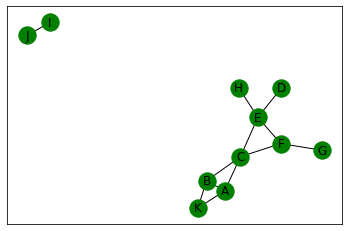

In [8]:
import networkx as nx  
  
G = nx.Graph() 
  
G.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),  
                  ('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),  
                  ('E', 'F'), ('E', 'D'), ('E', 'H'), ('I', 'J')]) 
  
nx.draw_networkx(G, with_labels = True, node_color ='green') 
  
# returns True or False whether Graph is connected 
print(nx.is_connected(G)) 
  
# returns number of different connected components 
print(nx.number_connected_components(G)) 
  
# returns list of nodes in different connected components 
print(list(nx.connected_components(G))) 
  
# returns list of nodes of component containing given node  
print(nx.node_connected_component(G, 'I')) 
  
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(G)) 
  
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(G))

### Connectivity for a Directed Graph –
#### A directed graph is strongly connected if for every pair of nodes u and v, there is a directed path from u to v and v to u.
##### It is weakly connected if replacing all the edges of the directed graph with undirected edges will produce a Undirected Connected Graph. They can be checked by the following code:


{'A': ['A'], 'B': ['A', 'B'], 'K': ['A', 'K'], 'C': ['A', 'C'], 'F': ['A', 'C', 'F'], 'E': ['A', 'C', 'E'], 'G': ['A', 'C', 'F', 'G'], 'D': ['A', 'C', 'E', 'D'], 'H': ['A', 'C', 'E', 'H'], 'I': ['A', 'C', 'E', 'H', 'I'], 'J': ['A', 'C', 'E', 'H', 'I', 'J']}
{'A': 0, 'B': 1, 'K': 1, 'C': 1, 'F': 2, 'E': 2, 'G': 3, 'D': 3, 'H': 3, 'I': 4, 'J': 5}
['A', 'C', 'F', 'G']
3
[['A', 'B', 'C', 'F', 'E', 'H', 'I', 'J'], ['A', 'B', 'C', 'E', 'H', 'I', 'J'], ['A', 'K', 'B', 'C', 'F', 'E', 'H', 'I', 'J'], ['A', 'K', 'B', 'C', 'E', 'H', 'I', 'J'], ['A', 'C', 'F', 'E', 'H', 'I', 'J'], ['A', 'C', 'E', 'H', 'I', 'J']]
2.6363636363636362


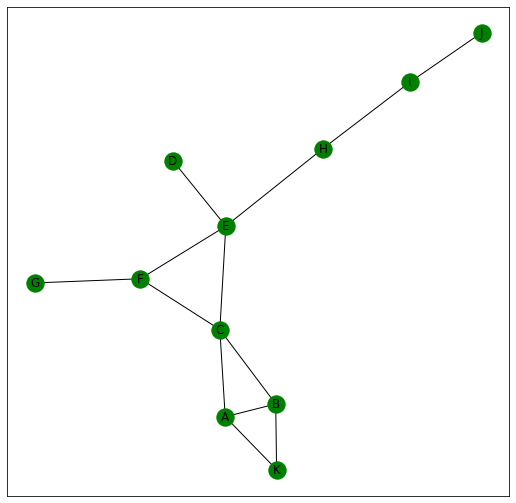

In [9]:
import networkx as nx  
import matplotlib.pyplot as plt 
  
G = nx.Graph() 
G.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),  
                  ('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),  
                  ('E', 'F'), ('E', 'D'), ('E', 'H'), ('H', 'I'), ('I', 'J')]) 
  
plt.figure(figsize =(9, 9)) 
nx.draw_networkx(G, with_labels = True, node_color ='green') 
  
print(nx.shortest_path(G, 'A')) 
# returns dictionary of shortest paths from A to all other nodes 
  
print((nx.shortest_path_length(G, 'A'))) 
# returns dictionary of shortest path length from A to all other nodes 
  
print(nx.shortest_path(G, 'A', 'G')) 
# returns a shortest path from node A to G 
  
print(nx.shortest_path_length(G, 'A', 'G')) 
# returns length of shortest path from node A to G 
  
print(list(nx.all_simple_paths(G, 'A', 'J'))) 
# returns list of all paths from node A to J 
  
print(nx.average_shortest_path_length(G)) 
# returns average of shortest paths between all possible pairs of nodes

## Few important characteristics of a Graph –
#### Eccentricity: For a node n in a graph G, the eccentricity of n is the largest possible shortest path distance between n and all other nodes.
##### Diameter : The maximum shortest distance between a pair of nodes in a graph G is its Diamater. It is the largest possible eccentricity value of a node.
#### Radius : It is the minimum eccentricity value of a node.
#### Periphery : It is the set of nodes that have their eccentricity equal to their Diameter.
#### Center : Center of a Graph is the set of nodes whose eccentricity is equal to the radius of the Graph.
Networkx offers built-in function for computing all these properties.


Eccentricity:  {'A': 5, 'B': 5, 'K': 6, 'C': 4, 'F': 4, 'G': 5, 'E': 3, 'D': 4, 'H': 4, 'I': 5, 'J': 6}
Diameter:  6
Radius:  3
Preiphery:  ['K', 'J']
Center:  ['E']


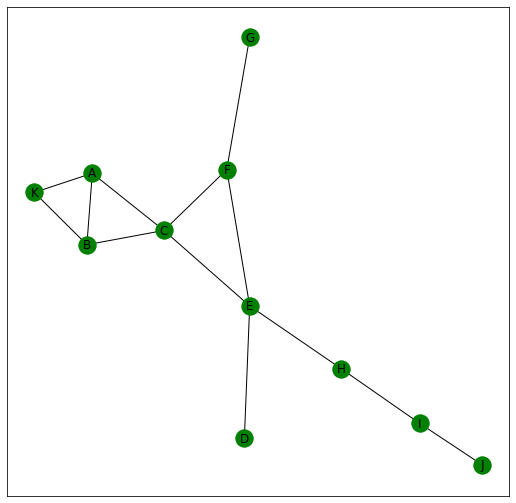

In [10]:
import networkx as nx  
import matplotlib.pyplot as plt 
  
G = nx.Graph() 
G.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),  
                  ('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),  
                  ('E', 'F'), ('E', 'D'), ('E', 'H'), ('H', 'I'), ('I', 'J')]) 
  
plt.figure(figsize =(9, 9)) 
nx.draw_networkx(G, with_labels = True, node_color ='green') 
  
print("Eccentricity: ", nx.eccentricity(G)) 
print("Diameter: ", nx.diameter(G)) 
print("Radius: ", nx.radius(G)) 
print("Preiphery: ", list(nx.periphery(G))) 
print("Center: ", list(nx.center(G))) 